# irisデータセットに対してクラスタリングをする

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

RANDOM_SEED=71

In [2]:
# 他プログラムと同じため説明割愛

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

X = iris.data[:, [2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_SEED)

# データの標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# モデルの学習

In [15]:
models=[]

from sklearn import cluster
from sklearn import mixture

# モデルのインスタンスを生成
models.append(cluster.MiniBatchKMeans(n_clusters=3))                    # MiniBatchKMeans
models.append(cluster.KMeans(n_clusters=3))                             # KMeans
models.append(cluster.Birch(n_clusters=3))                              # Birch
bandwidth = cluster.estimate_bandwidth(X_train_std, quantile=0.2)
models.append(cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)) # MeanShift
models.append(mixture.GaussianMixture(n_components=3, covariance_type='full')) # GMM

# モデルの学習。fit関数で行う。
for number, model in enumerate(models):
    # モデルの名前取得
    model_title = str(type(model)).split(".")[-1][:-2]
    print("model : " + model_title + " : " + str(number))
    
    models[number] = model.fit(X_train_std, y_train)


model : MiniBatchKMeans : 0
model : KMeans : 1
model : Birch : 2
model : MeanShift : 3
model : GaussianMixture : 4


In [16]:
#他プログラムと同じため説明は割愛

from sklearn.metrics import accuracy_score

for model in models:
    print("-------------------------------------------")
    model_title = str(type(model)).split(".")[-1][:-2]
    print("model : " + model_title)

    # トレーニングデータに対する精度
    pred_train = model.predict(X_train_std)
    accuracy_train = accuracy_score(y_train, pred_train)
    print('  トレーニングデータに対する正解率： %.2f' % accuracy_train)

    # テストデータに対する精度
    pred_test = model.predict(X_test_std)
    accuracy_test = accuracy_score(y_test, pred_test)
    print('  テストデータに対する正解率： %.2f' % accuracy_test)

-------------------------------------------
model : MiniBatchKMeans
  トレーニングデータに対する正解率： 0.94
  テストデータに対する正解率： 1.00
-------------------------------------------
model : KMeans
  トレーニングデータに対する正解率： 0.39
  テストデータに対する正解率： 0.33
-------------------------------------------
model : Birch
  トレーニングデータに対する正解率： 0.00
  テストデータに対する正解率： 0.00
-------------------------------------------
model : MeanShift
  トレーニングデータに対する正解率： 0.95
  テストデータに対する正解率： 0.98
-------------------------------------------
model : GaussianMixture
  トレーニングデータに対する正解率： 0.31
  テストデータに対する正解率： 0.33


model No.0 : MiniBatchKMeans
model No.1 : KMeans
model No.2 : Birch
model No.3 : MeanShift
model No.4 : GaussianMixture


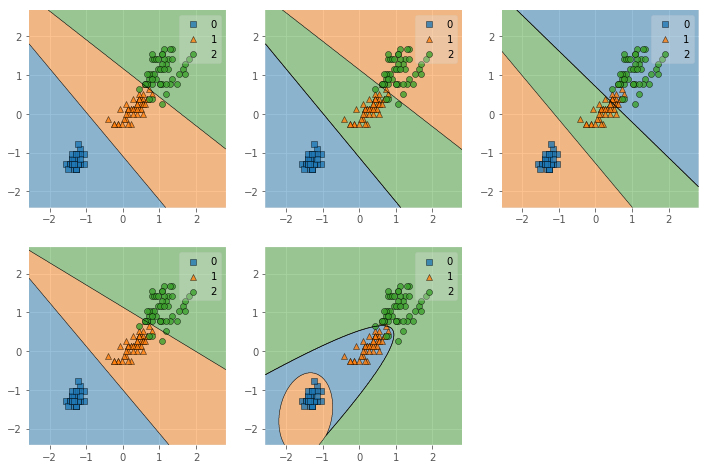

In [17]:
#他プログラムと同じため説明は割愛

#分類結果を図示する
import matplotlib.pyplot as plt

# scikit-laernやmatplotlibに含まれない機能を含むPythonライブラリ
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

#配列データの結合（教師データ＋試験データ）
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 可視化
fig = plt.figure(figsize=(12,8))

for number, model in enumerate(models):
    
    # 表示するモデル数に合わせて、ここの変数を変更してあげる必要あり
    plt.subplot(2, 3, number+1)

    # model名の取得
    # <class 'sklearn.linear_model.logistic.LogisticRegression'>
    # -> LogisticRegression
    model_title = str(type(model)).split(".")[-1][:-2]#[:-len("Classifier")]
    print("model No." + str(number) + " : " + model_title)

    # 分類器の決定境界を引いてくれる神機能(mlxtendに含まれる機能の１つ)
    # データとターゲット，分類器を渡すだけで描いてくれる
    plot_decision_regions(X_combined_std, y_combined, clf=model,  res=0.02)
plt.show()